In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = pd.read_csv('./Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.drop('Species', axis = 1, inplace=True)
iris.drop('Id', axis = 1, inplace=True)

In [5]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
X = iris.iloc[:, [0, 1, 2, 3]].values

In [7]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

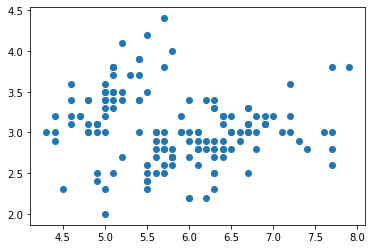

In [8]:
plt.scatter(X[:,0], X[:, 1])

## Determine Number of Cluster

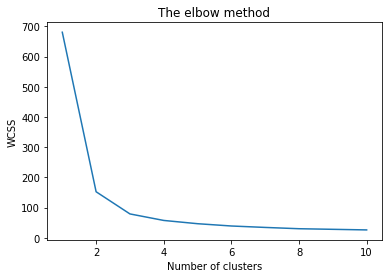

In [9]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [10]:
k = 3

color = ["red", "blue", "green"]
leg = ['Iris-setosa','Iris-versicolour', 'Iris-virginica']
clusters= {}
np.random.seed(7)
for i in range(k):
    
    center = np.random.randint(X[:,0].min(), X[:, 0].max(), size=(X.shape[1],))
    points = []
    
    cluster={
        'center' : center,
        'points' : points,
        'color' : color[i],
        'leg' : leg[i]
    }
    
    clusters[i] = cluster

In [11]:
clusters

{0: {'center': array([4, 5, 6, 4]),
  'points': [],
  'color': 'red',
  'leg': 'Iris-setosa'},
 1: {'center': array([5, 6, 4, 5]),
  'points': [],
  'color': 'blue',
  'leg': 'Iris-versicolour'},
 2: {'center': array([6, 6, 6, 4]),
  'points': [],
  'color': 'green',
  'leg': 'Iris-virginica'}}

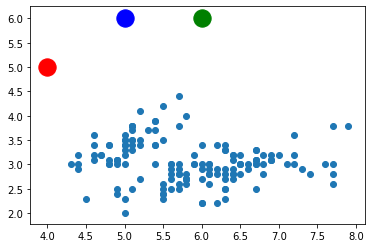

In [12]:
for i in range(k):
    center = clusters[i]['center']
    plt.scatter(center[0],center[1], c=clusters[i]['color'], marker="o", s=300)

plt.scatter(X[:,0], X[:, 1])
plt.show()

## Step 2 - Assign all point to nearest Cluster

In [13]:
def  distance(v1,v2):
    return np.sum((v2-v1)**2)**0.5

In [14]:
def assignPointsToCluster(clusters, X):
    for ix in range(X.shape[0]):
        distance_of_i = []
        
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center'])
            distance_of_i.append(d)
        
        #argmin because we need index of minimum not value
        cluster_to_choose = np.argmin(distance_of_i)
        
        #assign the points to a cluster
        clusters[cluster_to_choose]['points'].append(X[ix])

In [15]:
assignPointsToCluster(clusters, X)

In [26]:
def plotclusters(clusters):
    for kx in range(k):
        cluster_ke_points = clusters[kx]['points']
        cluster_ka_color = clusters[kx]['color']
        cluster_ka_center = clusters[kx]['center']
        cluster_ka_leg = clusters[kx]['leg']
        #does not return array so
        cluster_ke_points = np.array(cluster_ke_points)

        
        if len(cluster_ke_points) >0:
            plt.scatter(cluster_ke_points[:, 0], cluster_ke_points[:, 1], c=cluster_ka_color, label= cluster_ka_leg )
            plt.legend()
        plt.scatter(cluster_ka_center[0],cluster_ka_center[1], c='vi', marker="o", s=200)

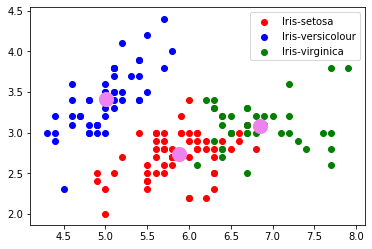

In [27]:
plotclusters(clusters)

## Step-3 Update centers to all points

In [18]:
def updateCluster(clusters):
    for kx in range(k):
        cluster_ke_points = clusters[kx]['points']
        cluster_ke_points = np.array(cluster_ke_points)
        
        if len(cluster_ke_points) > 0:
            
            new_center = np.mean(cluster_ke_points, axis = 0)
        
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = []
            #make points as empty so we can get new_points

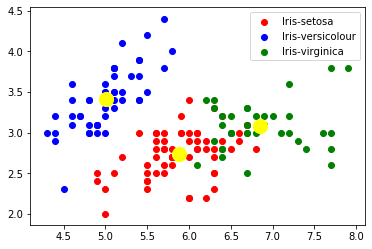

In [19]:
for i in range(1,10):
    updateCluster(clusters)
    assignPointsToCluster(clusters, X)
plotclusters(clusters)
